In [1]:
# Our data management libraries
import pandas as pd
import numpy as np

# A basic visualization library
import matplotlib.pyplot as plt

# A great visualization library
import seaborn as sns

# Very important, this will make your charts appear in your notebook instead of in a new window.
%matplotlib inline

In [2]:
df = pd.read_csv('../dataset/df_only_adoption_nov_03.csv')
df.head()

,Primary_Color,Sex,Age,Intake_Date,Intake_Condition,Intake_Type,days_stayed
0,BLACK,Unknown,4,9/11/19,UNDER AGE/WEIGHT,STRAY,1092
1,BRN TABBY,Spayed,6,12/19/18,NORMAL,STRAY,799
2,BRN TABBY,Spayed,9,10/4/19,NORMAL,OWNER SURRENDER,760
3,ORG TABBY,Neutered,12,6/24/17,ILL MILD,STRAY,685
4,BRN TABBY,Neutered,8,7/13/17,NORMAL,STRAY,666


# Minimal Data cleaning begins

## check for duplicate values

In [4]:
# 1. Print the number of duplicate rows we have in our dataframe.
print(df.duplicated().sum())

74


## check null values

In [5]:
# 1. Print the number of null rows we have in our dataframe.
print(df.isnull().sum())

Primary_Color       0
Sex                 0
Age                 0
Intake_Date         0
Intake_Condition    0
Intake_Type         0
days_stayed         0
dtype: int64


## Observation: Animal_Name, Secondary_Color, DOB, Age, Intake_Subtype, Reason_for_Intake, Outcome_Date, Crossing, Outcome_Type and Outcome_Subtype are the columns which has null values

**Among these columns Age is the only feature or column that will be essential for our project so we will have to work around with the null values of this columns**

In [6]:
# rechecking for null values
print(df.isnull().sum())

Primary_Color       0
Sex                 0
Age                 0
Intake_Date         0
Intake_Condition    0
Intake_Type         0
days_stayed         0
dtype: int64


# Data ploting and visualization begins here

### Graphing individual columns

In [7]:
# selecting rows that may matter for our prediction
new_df = df[['Primary_Color', 'Sex', 'Age','Intake_Date', 'Intake_Condition', 'Intake_Type','days_stayed']]
new_df

,Primary_Color,Sex,Age,Intake_Date,Intake_Condition,Intake_Type,days_stayed
0,BLACK,Unknown,4,9/11/19,UNDER AGE/WEIGHT,STRAY,1092
1,BRN TABBY,Spayed,6,12/19/18,NORMAL,STRAY,799
2,BRN TABBY,Spayed,9,10/4/19,NORMAL,OWNER SURRENDER,760
3,ORG TABBY,Neutered,12,6/24/17,ILL MILD,STRAY,685
4,BRN TABBY,Neutered,8,7/13/17,NORMAL,STRAY,666
...,...,...,...,...,...,...,...
3014,ORANGE,Spayed,2,8/21/21,NORMAL,STRAY,0
3015,ORG TABBY,Neutered,2,12/18/21,NORMAL,STRAY,0
3016,BRN TABBY,Spayed,1,5/18/22,UNDER AGE/WEIGHT,STRAY,0
3017,BLK TABBY,Spayed,1,11/10/22,NORMAL,RETURN,0


In [8]:
# exporting csv file
new_df.to_csv("../dataset/df_only_adoption_nov_03.csv", index = False)

In [9]:
# checking the shape of our new dataset
print(new_df.shape)

(3019, 7)


## We will drop from Primary_Color

In [10]:
# Define the values to be dropped
values_to_drop = ['SEAL', 'SILVER', 'CREAM PT', 'LILAC PT', 'YELLOW', 'L-C PT', 'BUFF', 'BR BRINDLE', 'ORG TIGER', 'TORTIE PT', 'CHOCOLATE', 'PINK', 'CRM TIGER', 'UNKNOWN']  

# Use boolean indexing to filter the DataFrame
new_df = new_df[~new_df['Primary_Color'].isin(values_to_drop)]
new_df.head()

,Primary_Color,Sex,Age,Intake_Date,Intake_Condition,Intake_Type,days_stayed
0,BLACK,Unknown,4,9/11/19,UNDER AGE/WEIGHT,STRAY,1092
1,BRN TABBY,Spayed,6,12/19/18,NORMAL,STRAY,799
2,BRN TABBY,Spayed,9,10/4/19,NORMAL,OWNER SURRENDER,760
3,ORG TABBY,Neutered,12,6/24/17,ILL MILD,STRAY,685
4,BRN TABBY,Neutered,8,7/13/17,NORMAL,STRAY,666


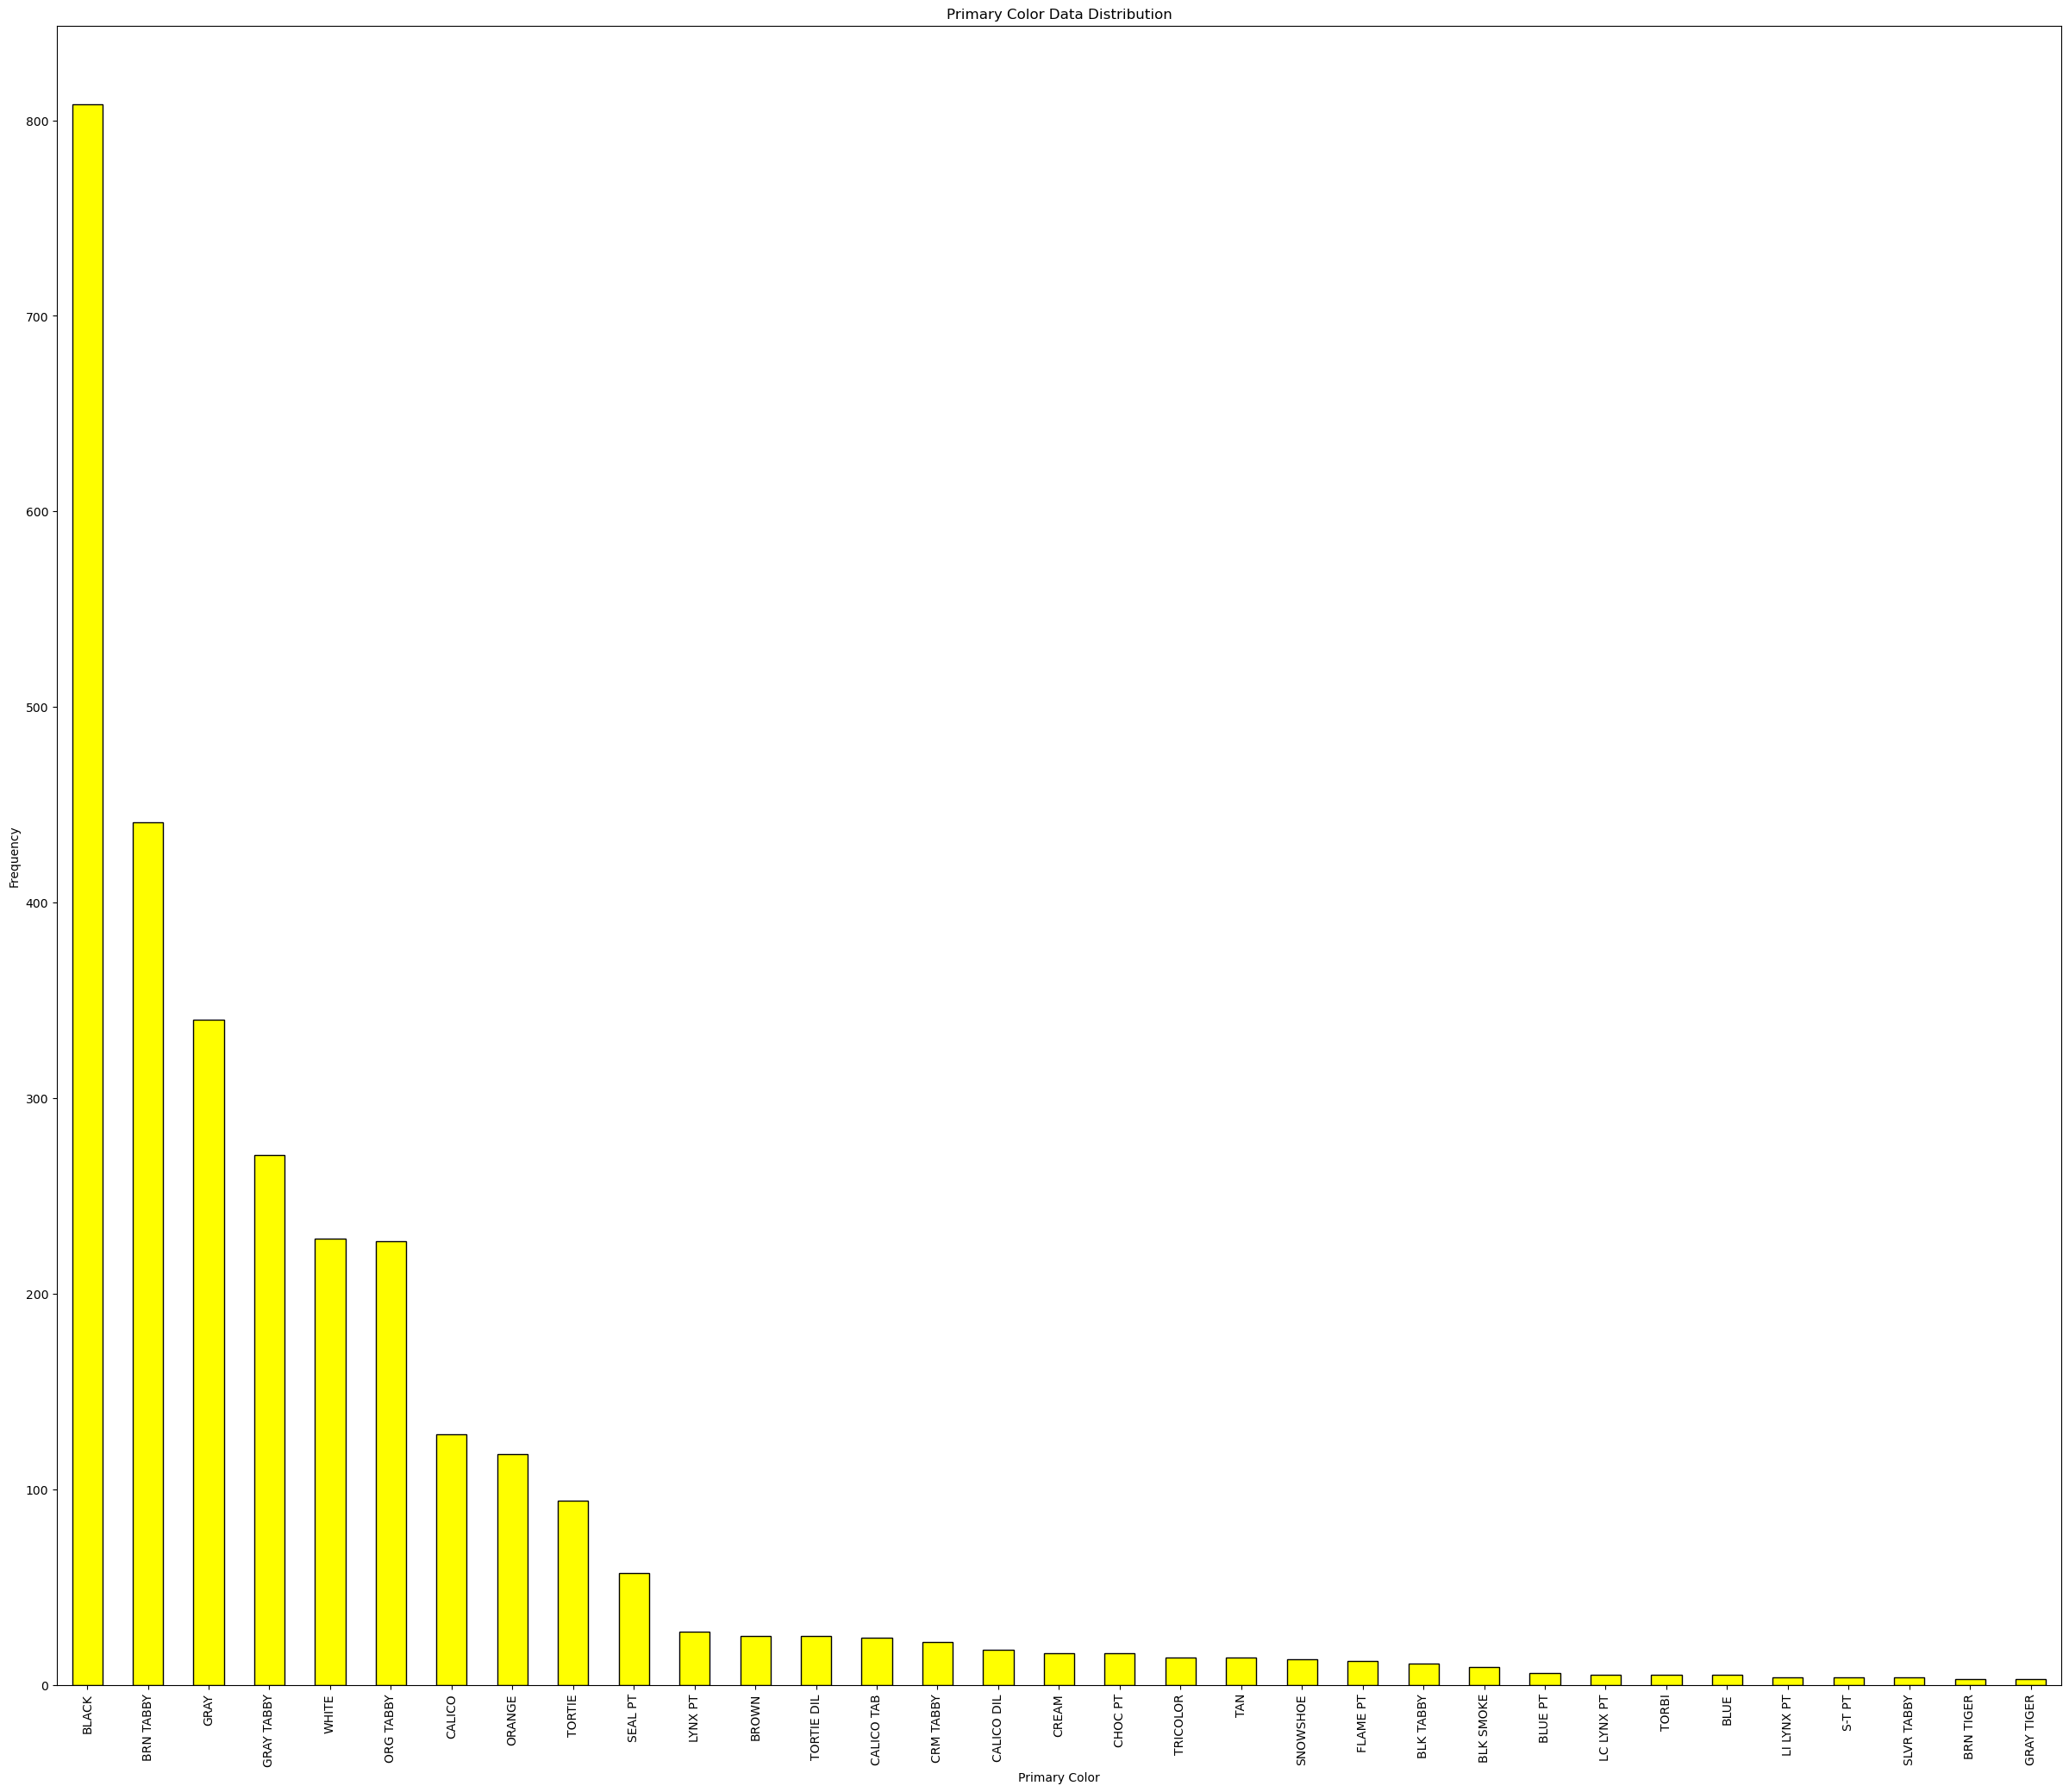

In [11]:
# ploting bar plot for Primary_Color column

category_counts = new_df['Primary_Color'].value_counts()
category_counts.plot(kind='bar', color='yellow', edgecolor='black', figsize= (30,25))

# Adding labels and title
plt.xlabel('Primary Color')
plt.ylabel('Frequency')
plt.title('Primary Color Data Distribution')

# Display the plot
plt.show()

# dropping 'Unknown' from sex

In [12]:
# Define the values to be dropped
values_to_drop = ['Unknown']  

# Use boolean indexing to filter the DataFrame
new_df = new_df[~new_df['Sex'].isin(values_to_drop)]
new_df.head()

,Primary_Color,Sex,Age,Intake_Date,Intake_Condition,Intake_Type,days_stayed
1,BRN TABBY,Spayed,6,12/19/18,NORMAL,STRAY,799
2,BRN TABBY,Spayed,9,10/4/19,NORMAL,OWNER SURRENDER,760
3,ORG TABBY,Neutered,12,6/24/17,ILL MILD,STRAY,685
4,BRN TABBY,Neutered,8,7/13/17,NORMAL,STRAY,666
5,GRAY TABBY,Spayed,8,5/10/17,NORMAL,STRAY,661


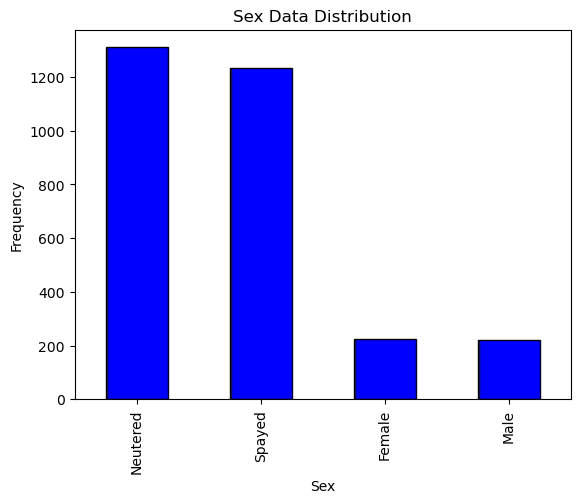

In [13]:
# ploting bar plot for sex column

category_counts = new_df['Sex'].value_counts()
category_counts.plot(kind='bar', color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Sex Data Distribution')

# Display the plot
plt.show()

# not dropping from age

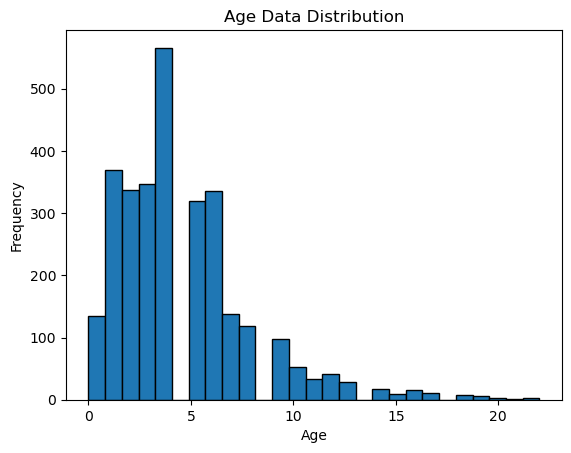

In [14]:
# ploting bar plot for age column
new_df['Age'].plot(bins=27, kind='hist', edgecolor='black')

# category_counts = new_df['Sex'].value_counts()
# category_counts.plot(kind='bar', color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Data Distribution')

# # Display the plot
plt.show()

**Here we see histogram has outliers on both end and we need to remove these outliers for the sake of accurate prediction**

# not dropping from Intake_Condition

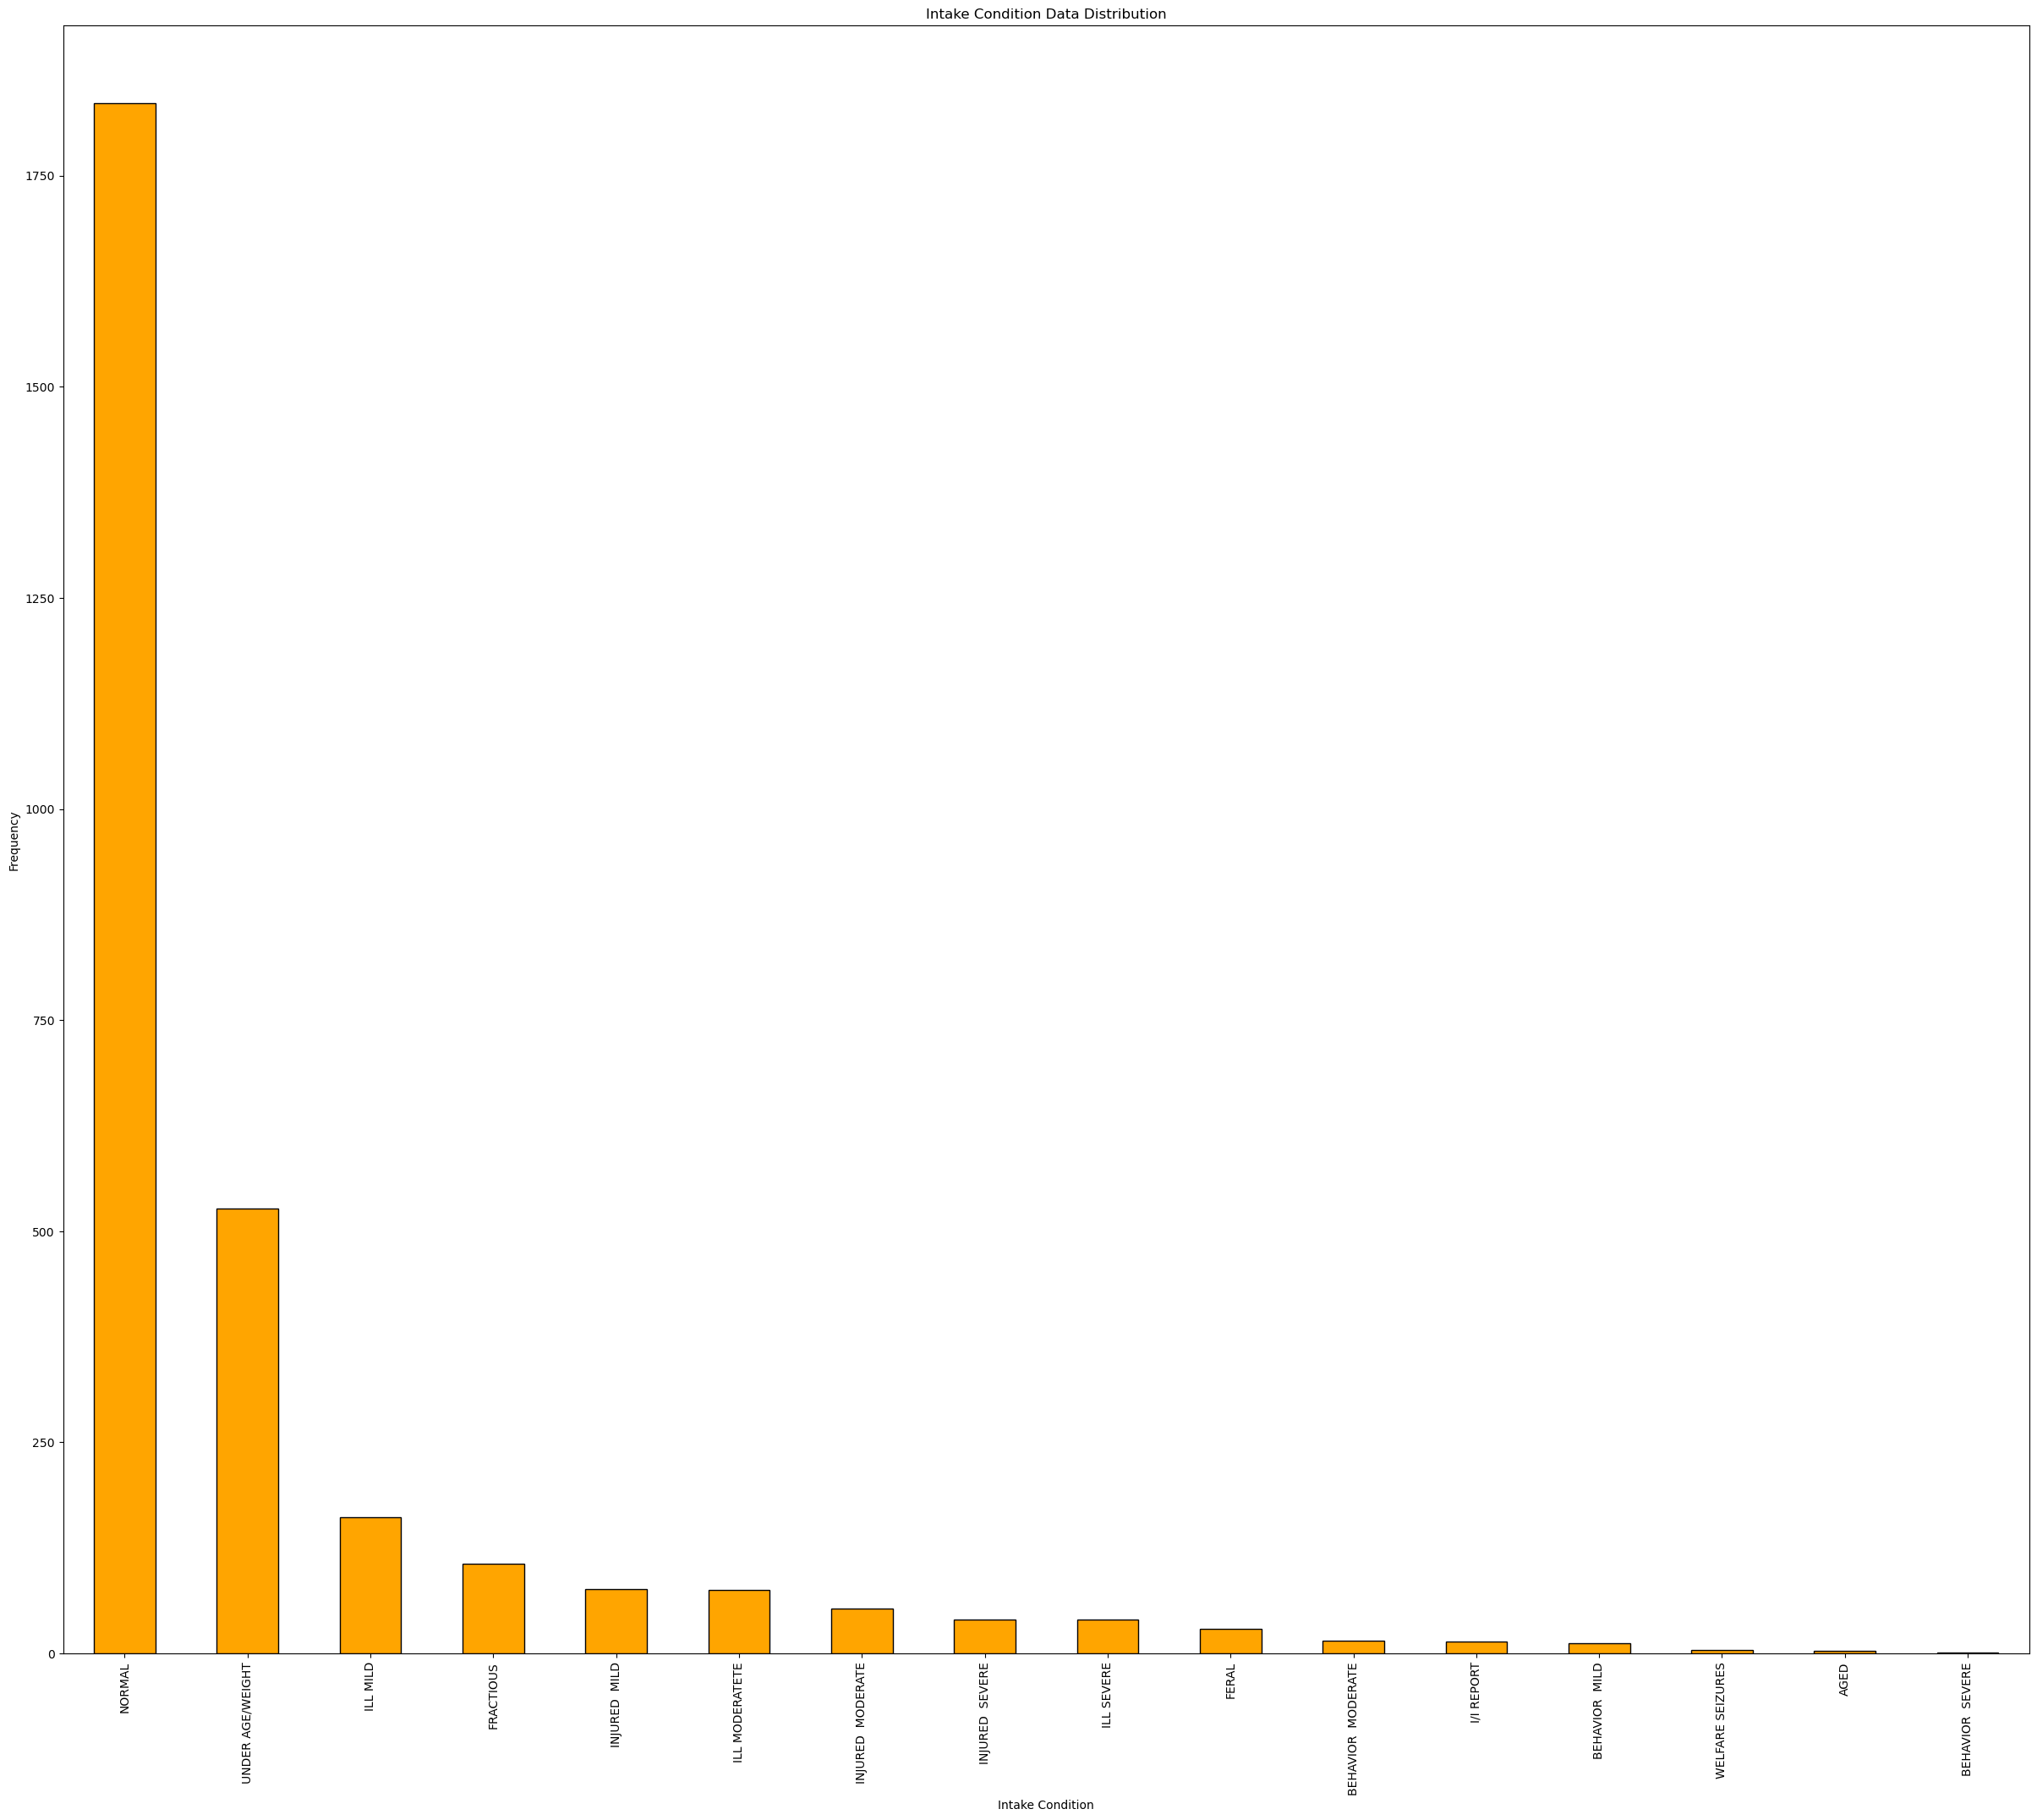

In [15]:
# ploting bar plot for Intake_Condition column
category_counts = new_df['Intake_Condition'].value_counts()
category_counts.plot(kind='bar', color='orange', edgecolor='black', figsize= (30,25))

# Adding labels and title
plt.xlabel('Intake Condition')
plt.ylabel('Frequency')
plt.title('Intake Condition Data Distribution')

# Display the plot
plt.show()

## We will drop from Intake Type

In [16]:
# Define the values to be dropped
values_to_drop = ['QUARANTINE', 'SAFE KEEP', 'TRAP, NEUTER, RETURN']

# Use boolean indexing to filter the DataFrame
new_df = new_df[~new_df['Intake_Type'].isin(values_to_drop)]
new_df.head()

,Primary_Color,Sex,Age,Intake_Date,Intake_Condition,Intake_Type,days_stayed
1,BRN TABBY,Spayed,6,12/19/18,NORMAL,STRAY,799
2,BRN TABBY,Spayed,9,10/4/19,NORMAL,OWNER SURRENDER,760
3,ORG TABBY,Neutered,12,6/24/17,ILL MILD,STRAY,685
4,BRN TABBY,Neutered,8,7/13/17,NORMAL,STRAY,666
5,GRAY TABBY,Spayed,8,5/10/17,NORMAL,STRAY,661


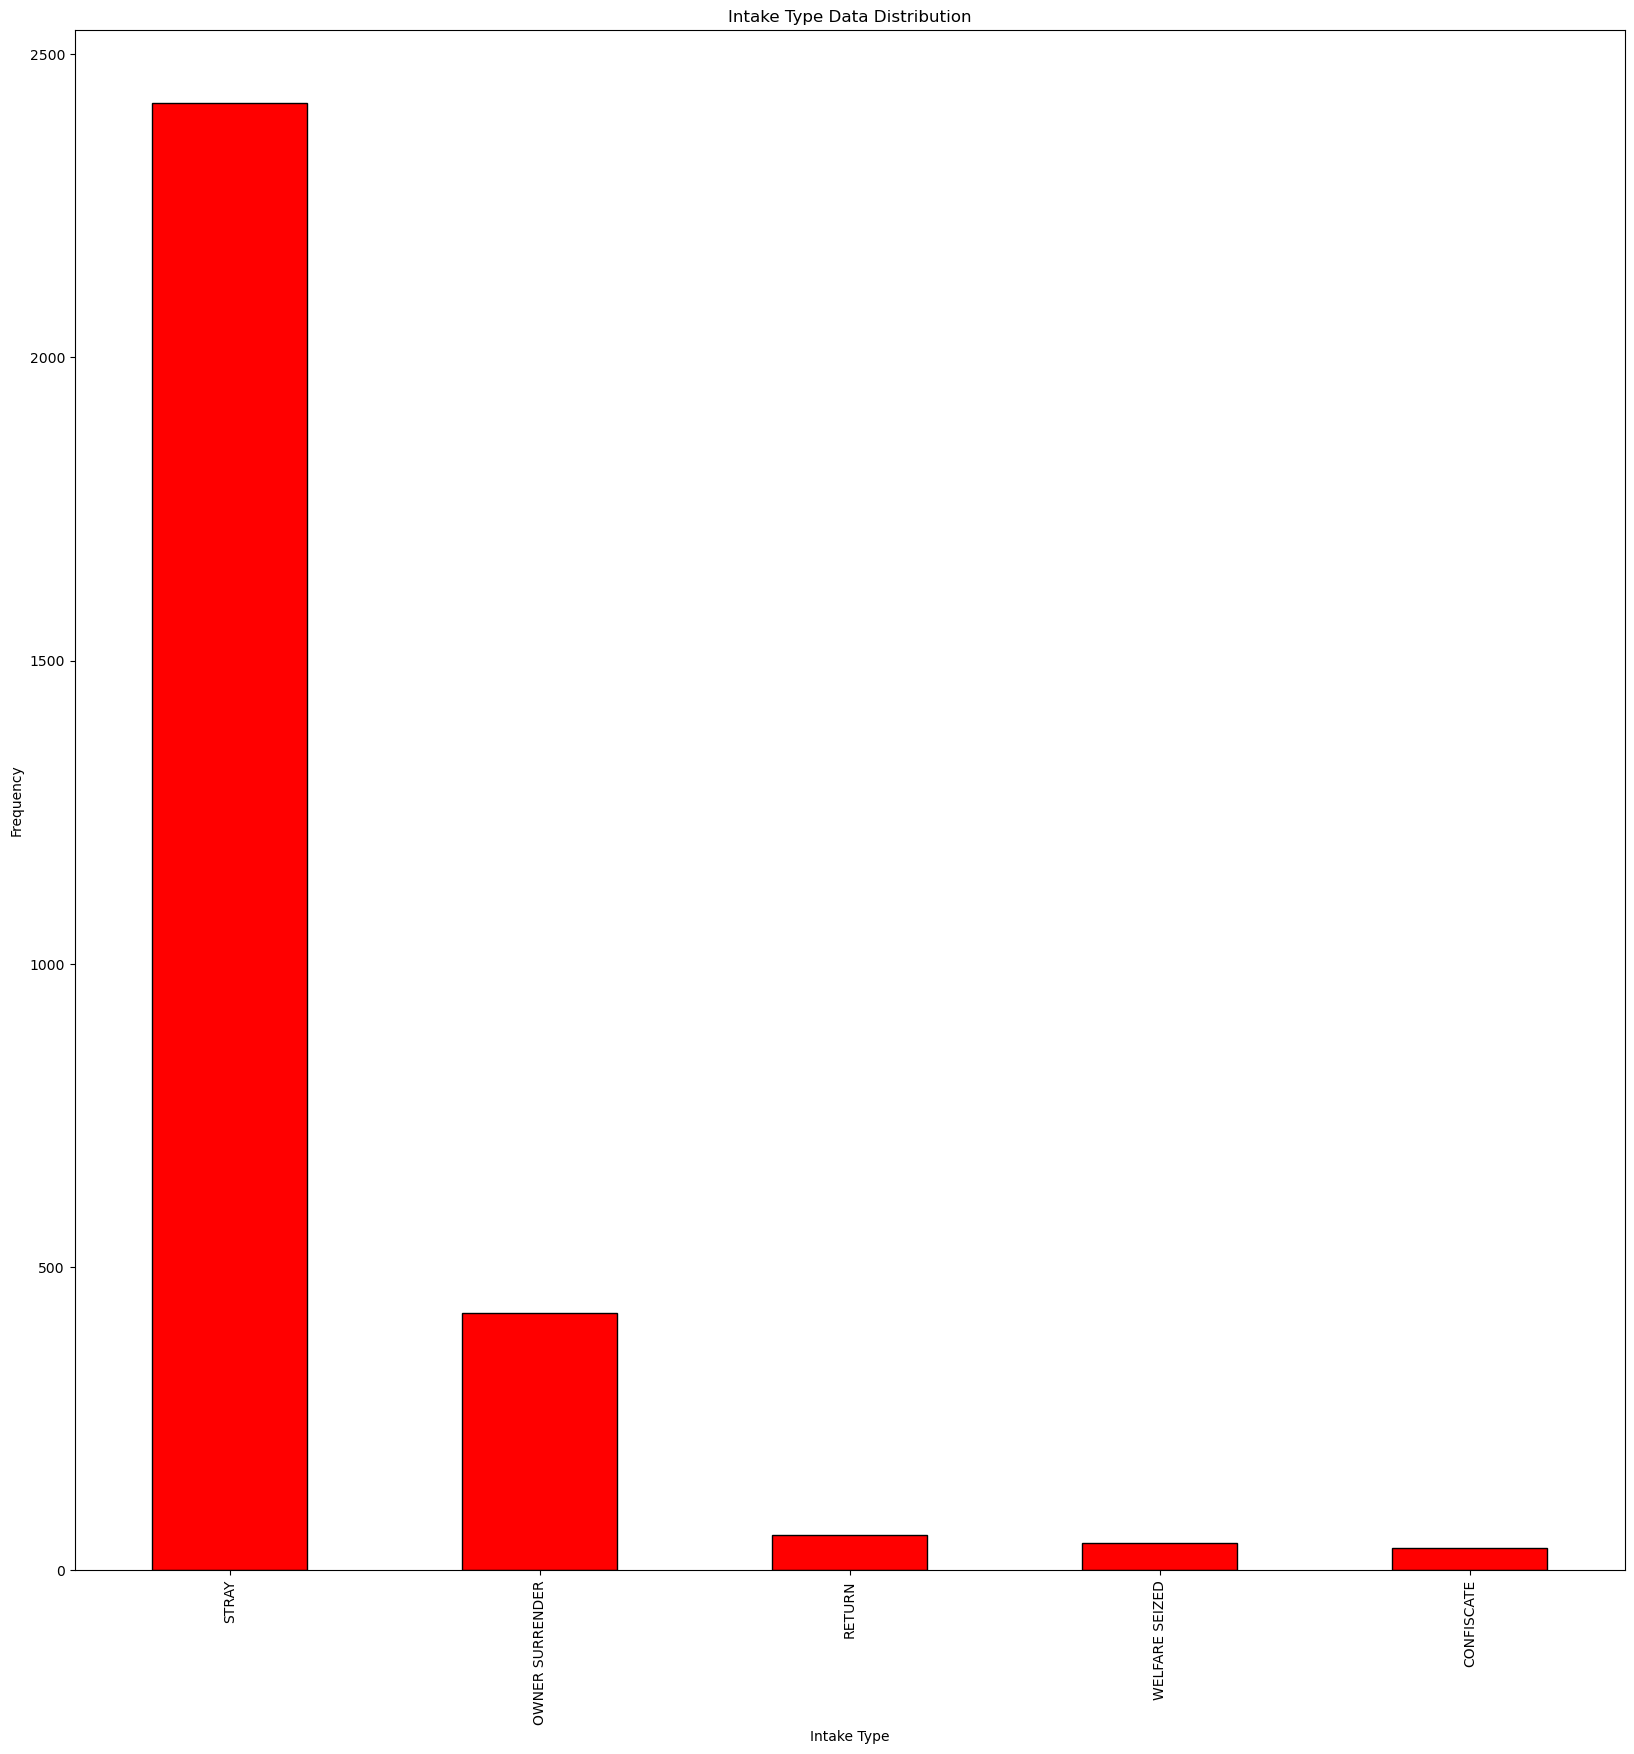

In [17]:
# ploting bar plot for Intake Type column

category_counts = new_df['Intake_Type'].value_counts()
category_counts.plot(kind='bar', color='red', edgecolor='black', figsize= (20,20))

# Adding labels and title
plt.xlabel('Intake Type')
plt.ylabel('Frequency')
plt.title('Intake Type Data Distribution')

# Display the plot
plt.show()

## We are not droping day_stayed

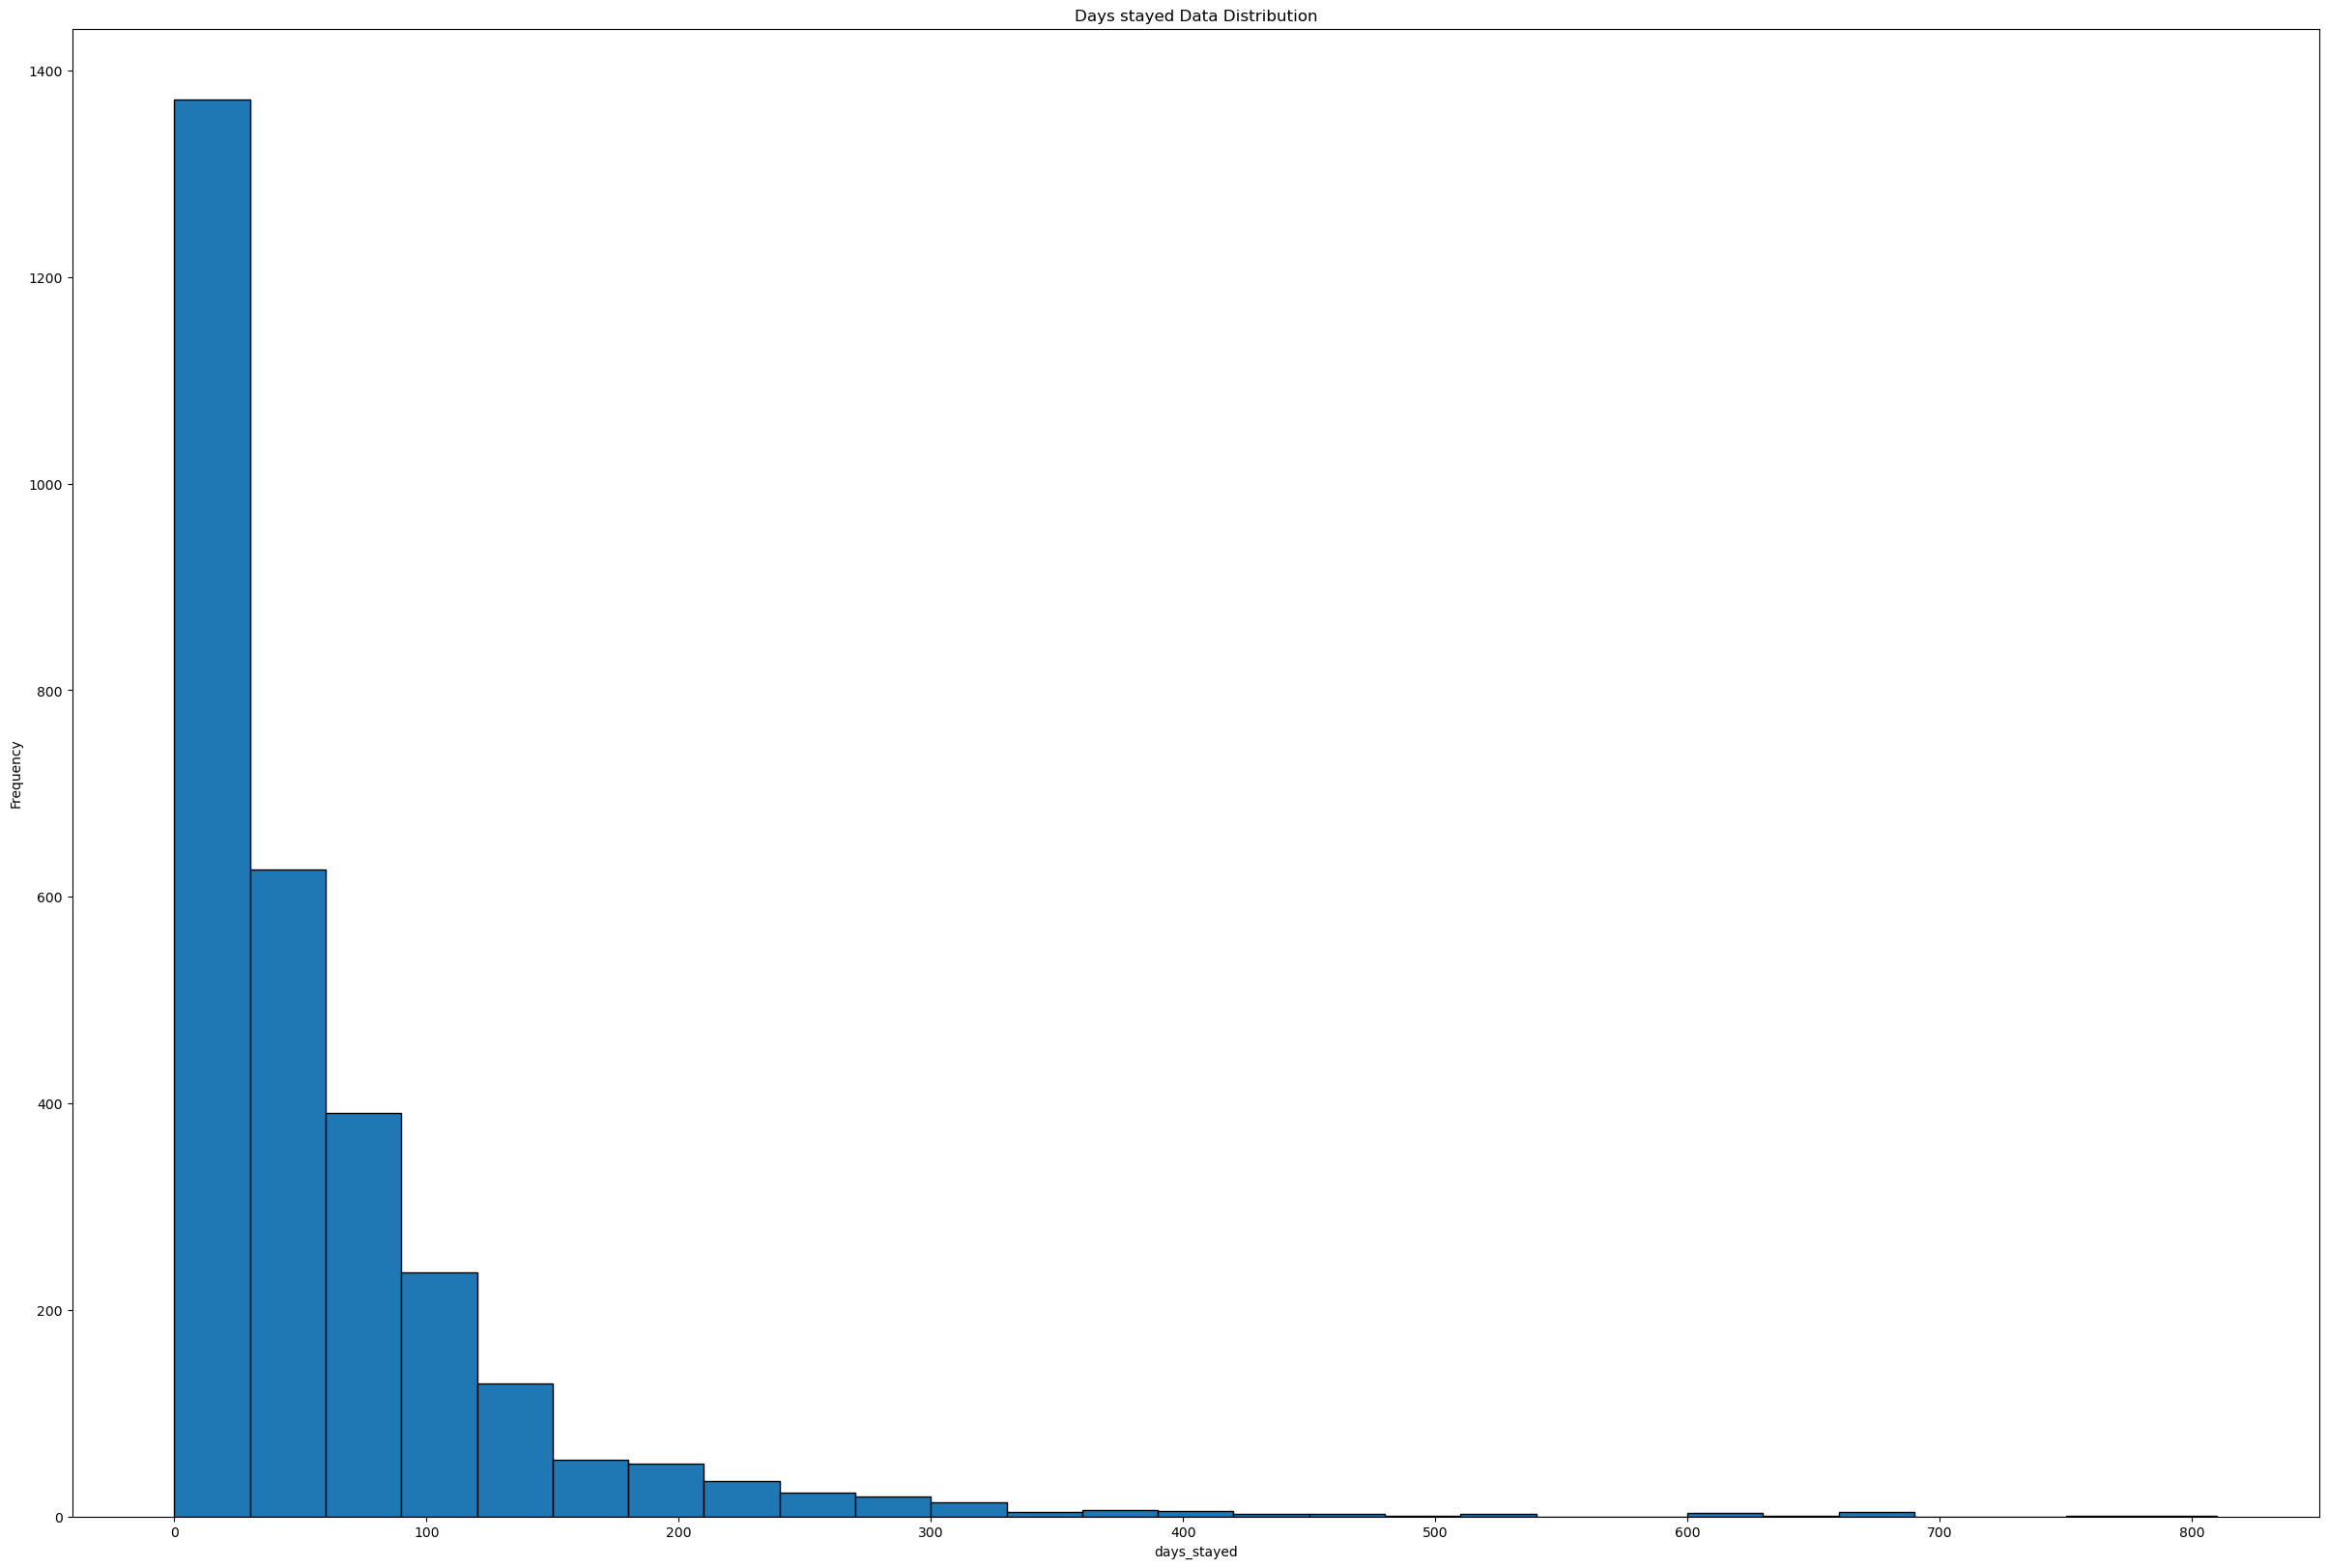

In [18]:
# ploting bar plot for days stayed column
# Calculate bin edges programmatically
bin_width = 30  # Adjust this based on your preference
min_value = int(np.floor(min(new_df['days_stayed']) / bin_width) * bin_width)
max_value = int(np.ceil(max(new_df['days_stayed']) / bin_width) * bin_width)
bins = range(min_value, max_value + bin_width, bin_width)

new_df['days_stayed'].plot(bins= bins, kind='hist', edgecolor='black', figsize= (30,20))

# category_counts = new_df['Sex'].value_counts()
# category_counts.plot(kind='bar', color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('days_stayed')
plt.ylabel('Frequency')
plt.title('Days stayed Data Distribution')

# # Display the plot
plt.show()

In [ ]:
# exporting outlier free csv file
new_df.to_csv("../dataset/df_outlier_free_nov_03.csv", index = False)

In [ ]:
print(new_df.shape)